## Setup
Install accompanying pinon library. It is better to install in dev mode in the conda environment with `pip install -e .` Jupyter server must restart to see changes to conda environment.
Auto reload the pinon module.  Other imports may be ignored for auto reload e.g.  `%aimport -simfin`. Note use of option 2 for auto reload and excluding other modules, rather than option 1 and including only reloadable modules.  This is because option 1 does not work correctly with aliased imports.

In [1]:
# !pip install -e ..

%load_ext autoreload
%autoreload 2
%aimport -pandas
%aimport -simfin
%aimport -os

%aimport pinon

%matplotlib inline

# imports
import pandas as pd
import seaborn as sns
import os

import pinon as pn
import pinon.names as pn_cols
import simfin as sf
import simfin.names as sf_cols  # column name shortcuts

config = pn.Config('master', 'V', 10)

Config file found at: /Users/daved/Dev/pinon/config/master.xlsx
Simfin data directory: /Users/daved/Dev/pinon/simfin_data
Dataset "us-companies" on disk (6 days old).
- Loading from disk ... Done!
Dataset "us-income-quarterly" on disk (2 days old).


/Users/daved/opt/anaconda3/envs/py3_10_8_pinon/lib/python3.10/site-packages/simfin/load.py:144: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... 

/Users/daved/opt/anaconda3/envs/py3_10_8_pinon/lib/python3.10/site-packages/simfin/load.py:144: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
Dataset "us-income-banks-quarterly" on disk (2 days old).
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Dataset "us-income-insurance-quarterly" on disk (2 days old).


/Users/daved/opt/anaconda3/envs/py3_10_8_pinon/lib/python3.10/site-packages/simfin/load.py:144: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Dataset "us-derived-quarterly" on disk (2 days old).


/Users/daved/opt/anaconda3/envs/py3_10_8_pinon/lib/python3.10/site-packages/simfin/load.py:144: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... 

/Users/daved/opt/anaconda3/envs/py3_10_8_pinon/lib/python3.10/site-packages/simfin/load.py:144: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
Dataset "us-derived-banks-quarterly" on disk (2 days old).
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
Dataset "us-derived-insurance-quarterly" on disk (2 days old).


/Users/daved/opt/anaconda3/envs/py3_10_8_pinon/lib/python3.10/site-packages/simfin/load.py:144: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!
There is an error in the supplied ticker symbol EEFT in Company List of sheet: V of config file: /Users/daved/Dev/pinon/config/master.xlsx. Company uses non stardard quarterly reporting date not currently supported. Company was dropped from the list.
There is an error in the supplied ticker symbol PAGS in Company List of sheet: V of config file: /Users/daved/Dev/pinon/config/master.xlsx. Company was not found and was dropped from the list.


/Users/daved/opt/anaconda3/envs/py3_10_8_pinon/lib/python3.10/site-packages/simfin/load.py:144: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


In [2]:
comps = pn.Comps(config)
comps.run_ratios()
comps.run_variations()
comps.run_target_ks()

Dataset "us-shareprices-daily" on disk (2 days old).
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... 

/Users/daved/opt/anaconda3/envs/py3_10_8_pinon/lib/python3.10/site-packages/simfin/load.py:144: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
Dataset "us-derived-shareprices-daily" on disk (2 days old).
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... 

/Users/daved/opt/anaconda3/envs/py3_10_8_pinon/lib/python3.10/site-packages/simfin/load.py:144: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(path, sep=';', header=0,


Done!
Adding breaking report for ticker V for report date 2023-03-31
Adding breaking report for ticker DFS for report date 2023-03-31
Here
Here


In [4]:
m = pn.Multiples('V', config)
m.run_mu_multiples()
m.mu_multiples

Adding breaking report for ticker V for report date 2023-03-31
Here


,Mu Quarterly PE Ratio,Mu TTM Quarterly PE Ratio
Mu Number of Years,,
0 year,28.103719,30.561229
1 year,28.799137,29.831903
3 year,39.424618,40.806618
5 year,38.212554,39.729736


/var/folders/9p/f2tvcxd55k125ycs4hyyx6800000gn/T/ipykernel_81839/1445406272.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  comps.all_ks.loc['V', 'MA'][pn_cols.K_QTR_PE].plot()


<AxesSubplot: xlabel='Report Date'>

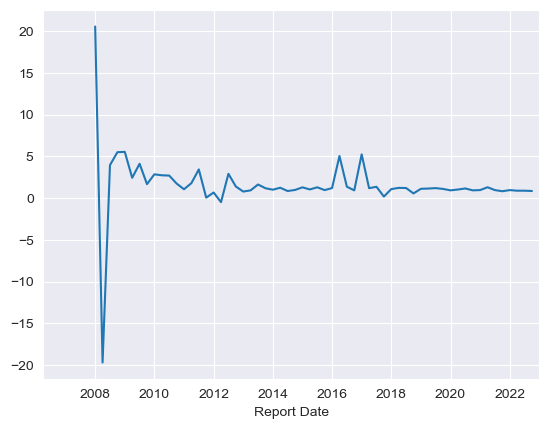

In [10]:
comps.all_ks.loc['V', 'MA'][pn_cols.K_QTR_PE].plot()

<AxesSubplot: xlabel='Target Ticker,Peer Ticker,Report Date'>

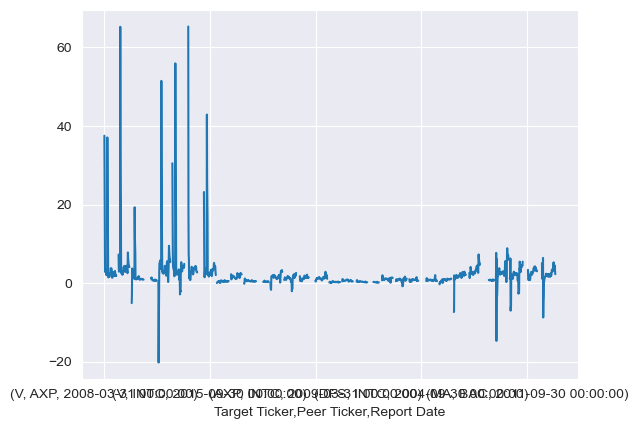

In [8]:
comps.all_ks.loc[:, pn_cols.K_TTM_QTR_PE].plot()

In [ ]:
tr = pn.Multiples('V', config)
tr.init_dataframe()
tr.calc_quarterly_pe()

In [ ]:
tr = pn.Multiples('V', config)
tr.init_dataframe()
ratios = tr.calc_quarterly_pe()
temp = pd.concat([ratios], keys=['V'], names=[sf_cols.TICKER])
temp1 = temp.join(ratios)

Various experiments below

In [ ]:
dp = pn.DailyPrices()
spr = dp.get_downsampled_share_price_ratios('V')
pr = dp.get_downsampled_prices('V')
p = dp.get_daily_prices('V')
ratios = dp.get_daily_share_price_ratios('V')
ratios.loc['2022-10-1':'2022-12-30', sf_cols.PE_QUARTERLY]

In [ ]:
fund = pn.Fundamentals()
dr = fund.get_quarterly_derived_ratios('V')

In [ ]:
comp = pd.DataFrame(index = pe.index, columns=['Closing Price', 'Quarterly EPS', 'SimFin Quarterly EPS', 'PE TTM', 'SimFin PE TTM', 'Qtr PE', 'SimFin Qtr PE'])
comp['Closing Price'] = pr.loc[:, sf_cols.CLOSE]
comp['Quarterly EPS'] = pe.loc[:, 'Quarterly EPS']
comp['SimFin Quarterly EPS'] = dr.loc[:, sf_cols.EPS_DILUTED]
comp['PE TTM'] = pe.loc[:, 'TTM PE Ratio']
comp['SimFin PE TTM'] = spr.loc[:, sf_cols.PE_TTM]
comp['Qtr PE'] = pe.loc[:, pn_cols.QTR_PE_RATIO]
comp['SimFin Qtr PE'] = spr.loc[:, sf_cols.PE_QUARTERLY]

In [ ]:
p = dp.get_daily_prices('V')
inc1 = fund.get_quarterly_income_statement('V')
re_inc1 = inc1.asfreq(freq='D', method='ffill')
pe_x = pd.DataFrame(columns=['QTR_EPS', 'QTR_PE'])
# pe = p.loc[:,sf_cols.CLOSE] / re_inc1.loc[:, sf_cols.NET_INCOME] / re_inc1.loc[:, sf_cols.SHARES_DILUTED]
pe_x['QTR_EPS'] = re_inc1.loc[:, sf_cols.NET_INCOME] / re_inc1.loc[:, sf_cols.SHARES_DILUTED]
pe_x['QTR_PE'] = p[sf_cols.CLOSE] / pe_x['QTR_EPS']
pe_x.loc['2022-07-01':'2022-09-30', 'QTR_PE'].mean()
# p.loc['2022-10-01':'2022-12-30', sf_cols.CLOSE].mean()